# 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

* 何を学習し、何を予測するのか  
→電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測しています。 
* どのようなファイルを作りKaggleに提出するか  
→テストセットの各SK_ID_CURRについて、TARGET変数の確率を予測したファイル。（ファイルにはヘッダーが含まれる）
* 提出されたものはどういった指標値で評価されるのか  
→ROC曲線面積で評価する

# 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

# 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。

正しく提出が行えていれば、精度は低くても構いません。

In [274]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats

In [275]:
# trainデータセットの準備
df = pd.read_csv("application_train.csv")

In [276]:
# trainデータの情報
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
# 欠損値の数
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [278]:
# データ型
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [279]:
# オブジェクト型の中身確認
# オブジェクトの列を抜き出し
df[df.columns[df.dtypes == "object"]]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [280]:
# オブジェクトの中身　ユニーク確認
for column in df.columns[df.dtypes == "object"]:
    print("オブジェクトのユニーク : {}".format(df[column].unique()))
    print("数 : {}\n".format(len(df[column].unique())))

オブジェクトのユニーク : ['Cash loans' 'Revolving loans']
数 : 2

オブジェクトのユニーク : ['M' 'F' 'XNA']
数 : 3

オブジェクトのユニーク : ['N' 'Y']
数 : 2

オブジェクトのユニーク : ['Y' 'N']
数 : 2

オブジェクトのユニーク : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
数 : 8

オブジェクトのユニーク : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
数 : 8

オブジェクトのユニーク : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
数 : 5

オブジェクトのユニーク : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
数 : 6

オブジェクトのユニーク : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
数 : 6

オブジェクトのユニーク : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Wait

In [281]:
# 欠損値の対応
# オブジェクトは最頻値で埋める
# 数字は平均値で埋める

# for + fillnaでオブジェクト欠損値を最頻値で埋める
# modeはの数値にアクセスするには[0]スライスが必要
df_obj = df.select_dtypes(include = ['object'])
for col_obj in df_obj.columns:
    df[col_obj] = df[col_obj].fillna(df_obj[col_obj].mode()[0])
    
# 数値の列名を取得
df_num = df.select_dtypes(include = ['float64', 'int64'])
for col_num in df_num.columns:
    df[col_num] = df[col_num].fillna(df_num[col_num].mean())

In [282]:
# obuject型の欠損値が埋められたか確認
df.select_dtypes(include = ['object']).isnull().sum().sum()

0

In [283]:
# 数字型の欠損値が埋められたか確認
df.select_dtypes(include = ['float64', 'int64']).isnull().sum().sum()

0

In [284]:
# 再度、欠損値の数を確認
df.isnull().sum().sum()

0

In [285]:
# 各オブジェクトをダミー処理
df_dummy = list(df.select_dtypes(include='object').columns)
df = pd.concat([df, pd.get_dummies(df[df_dummy])], axis = 1, sort = False)
df.drop(columns = df[df_dummy], inplace = True)

In [286]:
df.shape

(307511, 246)

* テストデータ準備

In [287]:
# テストデータの準備
df_test = pd.read_csv("application_test.csv")
# データの情報→target列がない
print(df_test.info())
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
# テストデータ
# オブジェクトの中身　ユニーク確認
for column in df_test.columns[df_test.dtypes == "object"]:
    print("オブジェクトのユニーク : {}".format(df_test[column].unique()))
    print("数 : {}\n".format(len(df_test[column].unique())))

オブジェクトのユニーク : ['Cash loans' 'Revolving loans']
数 : 2

オブジェクトのユニーク : ['F' 'M']
数 : 2

オブジェクトのユニーク : ['N' 'Y']
数 : 2

オブジェクトのユニーク : ['Y' 'N']
数 : 2

オブジェクトのユニーク : ['Unaccompanied' nan 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']
数 : 8

オブジェクトのユニーク : ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']
数 : 7

オブジェクトのユニーク : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
数 : 5

オブジェクトのユニーク : ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']
数 : 5

オブジェクトのユニーク : ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
数 : 6

オブジェクトのユニーク : [nan 'Low-skill Laborers' 'Drivers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Laborers' 'Managers' 'Accountants' 'Medicine staff'
 'Security staff' 'Private service staff' 'Secretaries' 'Cleaning staff'
 'Cooking staff' 'HR s

In [289]:
# テストデータ
# 欠損値の前処理（オブジェクトは最頻値、数字は平均で埋める）
# オブジェクトは最頻値
df_test_obj = df_test.select_dtypes(include = ['object'])
for col_test_obj in df_test_obj.columns:
    df_test[col_test_obj] = df_test[col_test_obj].fillna(df_test_obj[col_test_obj].mode()[0])
# 数値は平均値
df_test_num = df_test.select_dtypes(include = ['float64', 'int64'])
for col_test_num in df_test_num.columns:
    df_test[col_test_num] = df_test[col_test_num].fillna(df_test_num[col_test_num].mean())
# 欠損値の有無を再確認
df_test.isnull().sum().sum()

0

In [290]:
# テストデータ
# オブジェクトのone_hot化
df_test_dummy = list(df_test.select_dtypes(include='object').columns)
df_test = pd.concat([df_test, pd.get_dummies(df_test[df_test_dummy])], axis = 1, sort = False)
df_test.drop(columns = df_test[df_test_dummy], inplace = True)

In [291]:
# トレインとテストデータのshapeを確認
print(df.shape)
print(df_test.shape)

(307511, 246)
(48744, 242)


In [292]:
# trainとtestで列数が異なるため、互いに含まれない列を増やす
# 本来含まれていない列の値は０に設定

#testの列を増加
for column_df in df.columns:
    if column_df not in df_test.columns:
        df_test[column_df] = 0
# trainの列を増加
for column_test in df_test.columns:
    if column_test not in df.columns:
        df[column_test] = 0
#testデータに追加されたTARGETは削除
df_test.drop(columns="TARGET", inplace=True)

print(df.shape)
print(df_test.shape)

(307511, 246)
(48744, 245)


In [293]:
# trainデータ分割
from sklearn.model_selection import train_test_split
# Xとyに分割
y = df[["TARGET"]].copy()
df.drop(columns = "TARGET", inplace = True)
X = df.copy()
# ndarray変換
X_array = X.values
# yに関して一次元化（グラフ化で必要）
# y_array = np.ravel(y.values)
# この段階で一次元化すると標準化できない
y_array = y.values

X_train, X_valid, y_train, y_valid = train_test_split(
    X_array, y_array, test_size=0.25, random_state=0)

# testもndarray変換
X_test = df_test.values

In [294]:
# 各特徴量の標準化
from sklearn.preprocessing import StandardScaler
# X、yを分けてインスタンス化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_std = scaler_X.fit_transform(X_train)
X_valid_std = scaler_X.transform(X_valid)
X_test_std = scaler_X.transform(X_test)

# yの標準化はしない・・・０、１だから

# yの一次元化(ロジスティック回帰で必要)
y_train = np.ravel(y_train)
y_valid = np.ravel(y_valid)

In [295]:
# 分類機の関数
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ml_def(X_tr, y_tr, X_va, y_va, model):

    model.fit(X_tr, y_tr)
    y_train_predict_model = model.predict_proba(X_tr)
    # ROCによる評価
    # trainの結果
    fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_tr, y_train_predict_model[:, 1])
    print('train\nfpr：', fpr_train_model)
    print('tpr：', tpr_train_model)
    print('thresholds：', thresholds_train_model)
    print("roc_auc_score : ", roc_auc_score(y_tr, y_train_predict_model[:, 1]))

    # validの結果
    y_valid_predict_model = model.predict_proba(X_va)
    fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_va, y_valid_predict_model[:, 1])
    print('\nvalid\nfpr：', fpr_valid_model)
    print('tpr：', tpr_valid_model)
    print('thresholds：', thresholds_valid_model)
    print("roc_auc_score : ", roc_auc_score(y_va, y_valid_predict_model[:, 1]))
    
    # trainのROC曲線
    plt.figure()
    plt.plot(fpr_train_model, tpr_train_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('TRAIN')
    plt.grid()
    
    # validのROC曲線
    plt.figure()
    plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('VALID')
    plt.grid();

train
fpr： [0. 0. 1.]
tpr： [0. 1. 1.]
thresholds： [2. 1. 0.]
roc_auc_score :  1.0

valid
fpr： [0.         0.08974812 1.        ]
tpr： [0.         0.17205713 1.        ]
thresholds： [2. 1. 0.]
roc_auc_score :  0.5411545079417033


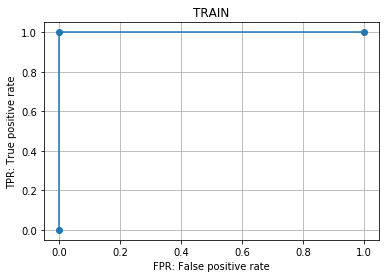

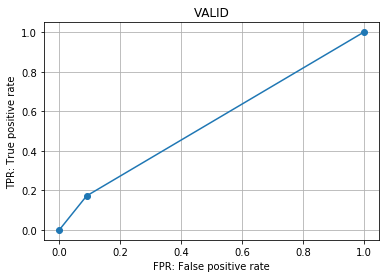

In [296]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
ml_def(X_train_std, y_train, X_valid_std, y_valid, dtree)

In [297]:
# 決定木　特徴量の重要度
fti_dtree = dtree.feature_importances_
# 特徴量の重要度　ソートで高いのサーチ
feat_dict_dtree = sorted(dict(zip(fti_dtree, df.columns)).items())
feat_dict_dtree

[(0.0, 'ORGANIZATION_TYPE_Religion'),
 (2.5709112911916857e-05, 'FLAG_DOCUMENT_7'),
 (3.6487775380923786e-05, 'FLAG_DOCUMENT_15'),
 (4.622423816329247e-05, 'ORGANIZATION_TYPE_Industry: type 8'),
 (5.13225821855395e-05, 'ORGANIZATION_TYPE_Trade: type 5'),
 (5.39064810838213e-05, 'FLAG_DOCUMENT_2'),
 (5.4602392271590194e-05, 'ORGANIZATION_TYPE_Trade: type 4'),
 (5.6777701104387046e-05, 'NAME_EDUCATION_TYPE_Academic degree'),
 (5.6912436987406506e-05, 'FLAG_DOCUMENT_17'),
 (8.73157184818435e-05, 'FLAG_DOCUMENT_13'),
 (0.00010240777831973386, 'ORGANIZATION_TYPE_Industry: type 13'),
 (0.00010324487999643297, 'ORGANIZATION_TYPE_Transport: type 1'),
 (0.00010727070607698821, 'NAME_INCOME_TYPE_Unemployed'),
 (0.00011666433836284166, 'WALLSMATERIAL_MODE_Monolithic'),
 (0.00011718359322841822, 'FLAG_DOCUMENT_21'),
 (0.00012086311215800323, 'ORGANIZATION_TYPE_Industry: type 12'),
 (0.0001235313722552376, 'ORGANIZATION_TYPE_Industry: type 10'),
 (0.00014818308689164506, 'FLAG_DOCUMENT_19'),
 (0.00

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.71922944e-06 5.66307533e-05 8.35303612e-04
 7.10715954e-03 4.56066333e-02 2.57202724e-01 1.00000000e+00]
tpr： [0.         0.02620903 0.14011957 0.3566777  0.61609907 0.82251521
 0.93797374 0.98387958 0.9972243  0.99973311 1.         1.        ]
thresholds： [2.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]
roc_auc_score :  0.999815970330205

valid
fpr： [0.00000000e+00 1.41268877e-05 2.68410866e-04 1.29967367e-03
 6.03218105e-03 2.35919025e-02 7.61297978e-02 2.14827581e-01
 5.29701781e-01 1.00000000e+00]
tpr： [0.00000000e+00 8.20883270e-04 3.44770974e-03 1.05073059e-02
 2.82383845e-02 8.17599737e-02 2.05056641e-01 4.11755048e-01
 7.10392382e-01 1.00000000e+00]
thresholds： [1.8 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]
roc_auc_score :  0.6302396567936761


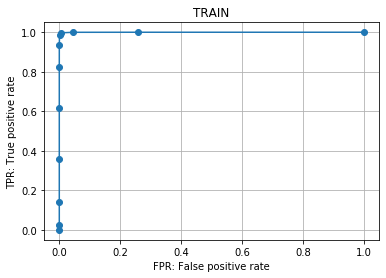

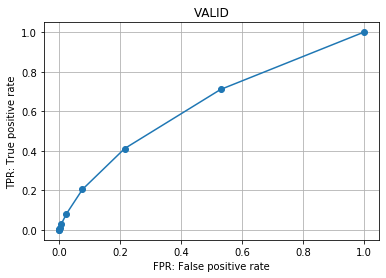

In [298]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc)

In [299]:
# ランダムフォレスト　特徴量の重要度
fti_rfc = rfc.feature_importances_
# 特徴量の重要度　ソートで高いのサーチ
feat_dict_rfc = sorted(dict(zip(fti_rfc, df.columns)).items())
feat_dict_rfc

[(0.0, 'NAME_FAMILY_STATUS_Unknown'),
 (2.602642880346624e-06, 'CODE_GENDER_XNA'),
 (8.315876110403113e-06, 'ORGANIZATION_TYPE_Trade: type 5'),
 (9.654773610036756e-06, 'NAME_INCOME_TYPE_Maternity leave'),
 (1.3702244190047996e-05, 'NAME_EDUCATION_TYPE_Academic degree'),
 (2.0467029734975237e-05, 'FLAG_DOCUMENT_17'),
 (2.04784679546275e-05, 'FLAG_DOCUMENT_20'),
 (2.6628269358144062e-05, 'ORGANIZATION_TYPE_Industry: type 8'),
 (2.853834072097028e-05, 'ORGANIZATION_TYPE_Religion'),
 (2.9773538094704165e-05, 'FLAG_DOCUMENT_15'),
 (3.218386192730887e-05, 'FLAG_DOCUMENT_7'),
 (4.167055389856692e-05, 'ORGANIZATION_TYPE_Trade: type 4'),
 (4.359176914928663e-05, 'ORGANIZATION_TYPE_Industry: type 10'),
 (5.914532447298229e-05, 'FLAG_DOCUMENT_2'),
 (6.946599825441413e-05, 'FLAG_DOCUMENT_13'),
 (7.184848724117766e-05, 'ORGANIZATION_TYPE_Industry: type 12'),
 (7.528898175948202e-05, 'FLAG_DOCUMENT_21'),
 (8.38388612009165e-05, 'FLAG_DOCUMENT_19'),
 (9.824289317731417e-05, 'ORGANIZATION_TYPE_Indust

決定木、ランダムフォレストともに過学習  
→木の深さに上限を設けて過学習防止（IDの重要度が高いが今回は無視！！）

# 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

* どの特徴量を使うか
* どう前処理をするか

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.41576883e-05 1.88769178e-05 3.30346061e-05 7.07884417e-05
 8.02269006e-05 1.36857654e-04 1.79330719e-04 2.31242243e-04
 2.40680702e-04 3.20907602e-04 5.04957551e-04 5.19115239e-04
 5.42711386e-04 5.71026763e-04 5.99342139e-04 6.41815204e-04
 8.30584382e-04 8.73057447e-04 9.58003577e-04 9.81599724e-04
 1.03351125e-03 1.08070354e-03 1.12317661e-03 1.17036890e-03
 1.28363041e-03 1.34498039e-03 1.37329577e-03 1.40633037e-03
 1.46768036e-03 2.04342635e-03 2.19444169e-03 2.33601857e-03
 2.37377241e-03 2.43984162e-03 2.46815700e-03 2.54366467e-03
 2.61445311e-03 2.76546845e-03 2.83625690e-03 2.86929150e-03
 3.87448737e-03 4.30865648e-03 4.55877564e-03 4.70035253e-03
 4.73810636e-03 4.86080633e-03 4.97878706e-03 5.16755624e-03
 5.20059085e-03 7.02693264e-03 7.35727870e-03 7.45638252e-03
 8.93350134e-03 9.22609356e-03 9.55643962e-03 9.99532796e-03
 1.00849933e-02 1.02360087e-02 1.05286009e-02 1.05946701e-02
 1.19349313e-

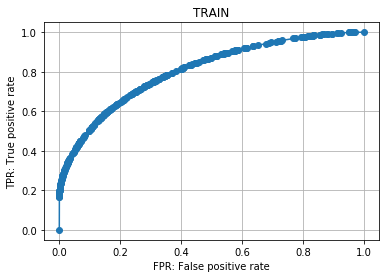

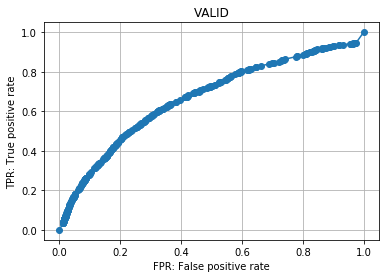

In [300]:
# DecisionTreeRegressor max_depth=15
dtree_depth15 = DecisionTreeClassifier(max_depth=15)
ml_def(X_train_std, y_train, X_valid_std, y_valid, dtree_depth15)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.         0.         0.         ... 0.99840962 0.99847569 1.        ]
tpr： [0.00000000e+00 1.60136650e-04 1.17433543e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
thresholds： [2.00000000e+00 1.00000000e+00 9.00418410e-01 ... 2.16450216e-04
 1.52905199e-04 0.00000000e+00]
roc_auc_score :  0.9569828230119479

valid
fpr： [0.00000000e+00 1.41268877e-05 7.06344385e-05 ... 9.98869849e-01
 9.98982864e-01 1.00000000e+00]
tpr： [0.         0.         0.         ... 0.99950747 0.99950747 1.        ]
thresholds： [1.71160631e+00 7.11606308e-01 6.14278702e-01 ... 4.27350427e-04
 1.52905199e-04 0.00000000e+00]
roc_auc_score :  0.6771138773984262


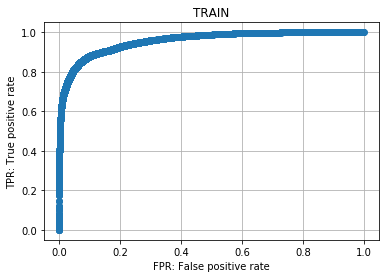

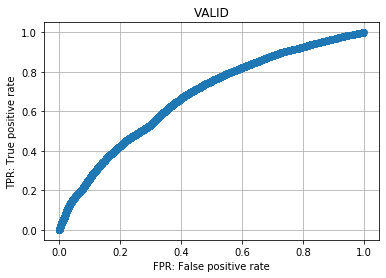

In [301]:
# ランダムフォレスト　max_depth=20
rfc_20 = RandomForestClassifier(max_depth=20)
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc_20)

* 決定木、ランダムフォレスト共に過学習への効果あり
→グリッドサーチ

In [302]:
# learning, GridSearchCVの関数(５分割)
import sklearn
def ml_def_gs(X_tr, y_tr, X_va, y_va, param, model):

    # グリッドサーチ
    licv=sklearn.model_selection.GridSearchCV(model,
                                              param_grid=param, cv=5, n_jobs=-1,scoring='roc_auc')
    # 学習
    licv.fit(X_tr, y_tr)
    predictor=licv.best_estimator_
    
    # trainの予測
    y_train_predict=predictor.predict_proba(X_tr)
    # trainのROCによる評価
    fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_tr, y_train_predict[:, 1])
    print('train\nfpr：', fpr_train_model)
    print('tpr：', tpr_train_model)
    print('thresholds：', thresholds_train_model)
    print("roc_auc_score : ", roc_auc_score(y_tr, y_train_predict[:, 1]))
    
    # trainの予測
    y_valid_predict=predictor.predict_proba(X_va)
    # validのROCによる評価
    fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_va, y_valid_predict[:, 1])
    print('\nvalid\nfpr：', fpr_valid_model)
    print('tpr：', tpr_valid_model)
    print('thresholds：', thresholds_valid_model)
    print("roc_auc_score : ", roc_auc_score(y_va, y_valid_predict[:, 1]))
         
    # trainのROC曲線
    plt.figure()
    plt.plot(fpr_train_model, tpr_train_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('TRAIN')
    plt.grid()
    
    # validのROC曲線
    plt.figure()
    plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('VALID')
    plt.grid();
    
    # 4. printing parameters of the predictor
    print(sorted(predictor.get_params(True).items()))
    
    # 5. printing importances of the predictor
    print(predictor.feature_importances_)

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.41576883e-05 4.24730650e-05 5.66307533e-05 9.43845889e-05
 1.13261507e-04 1.17980736e-04 1.55734572e-04 1.69892260e-04
 2.35961472e-04 8.96653594e-04 9.29688201e-04 9.67442036e-04
 1.01463433e-03 1.02407279e-03 1.11845738e-03 1.91128792e-03
 2.79378383e-03 3.43087981e-03 3.73762972e-03 5.32329081e-03
 5.37992157e-03 5.71498686e-03 6.03589446e-03 6.04533292e-03
 6.12555982e-03 1.00330818e-02 1.03728663e-02 1.14866045e-02
 1.17697582e-02 1.19254928e-02 1.22983119e-02 1.23596619e-02
 1.83861179e-02 2.26287052e-02 2.87353881e-02 2.91412418e-02
 3.02832953e-02 3.12932104e-02 3.14111912e-02 3.20530064e-02
 3.22984063e-02 3.28033639e-02 3.39878905e-02 4.10431385e-02
 4.11422423e-02 4.22135074e-02 4.23314881e-02 4.29733033e-02
 4.40492876e-02 4.46627875e-02 4.47571720e-02 4.99672014e-02
 5.04910358e-02 5.08827319e-02 5.70413263e-02 8.53802991e-02
 8.92075942e-02 9.41627851e-02 9.46394273e-02 9.47904426e-02
 9.49697733e-

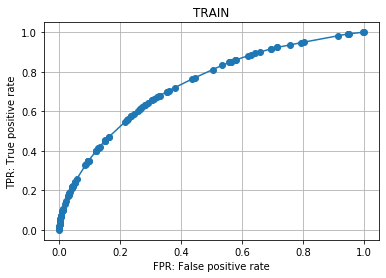

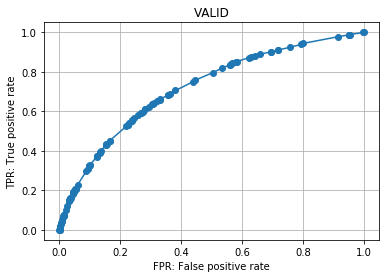

In [304]:
# 決定木のグリッドサーチ
# パラメータ調整
diparameter_dtree={"min_samples_leaf":[i for i in range(1, 9, 1)], "max_depth":[i for i in range(5, 10, 1)], "random_state":[123],}
# ml_def_gs(X_train_std, y_train, X_valid_std, y_valid, rfc_20)
ml_def_gs(X_train_std, y_train, X_valid_std, y_valid, diparameter_dtree, DecisionTreeClassifier())

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.         0.         0.         ... 0.99761679 0.99761679 1.        ]
tpr： [0.00000000e+00 5.33788833e-05 4.80409950e-04 ... 9.99946621e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.39014109 0.39014109 0.32609285 ... 0.02843511 0.02841707 0.01725302]
roc_auc_score :  0.7468919933021726

valid
fpr： [0.00000000e+00 0.00000000e+00 1.41268877e-05 ... 9.97217003e-01
 9.97217003e-01 1.00000000e+00]
tpr： [0.00000000e+00 1.64176654e-04 1.64176654e-04 ... 9.99835823e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.36675048 0.36675048 0.3500502  ... 0.02938012 0.02937365 0.02002757]
roc_auc_score :  0.7157564259416629
[('bootstrap', True), ('class_weight', None), ('criterion', 'gini'), ('max_depth', 8), ('max_features', 'auto'), ('max_leaf_nodes', None), ('min_impurity_decrease', 0.0), ('min_impurity_split', None), ('min_samples_leaf', 8), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 10), ('n_jobs', None), ('oob_score', False), ('random_state'

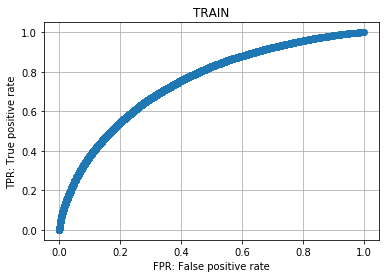

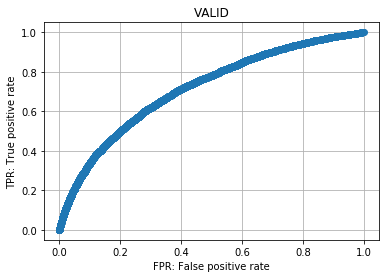

In [305]:
# ランダムフォレストのグリッドサーチ
# パラメータ調整
diparameter_rfc={"min_samples_leaf":[i for i in range(1, 9, 1)], "max_depth":[i for i in range(5, 10, 1)], "random_state":[123],}
ml_def_gs(X_train_std, y_train, X_valid_std, y_valid, diparameter_rfc, RandomForestClassifier())

* 過学習が改善された
* やや決定木の方がvalidで良い結果

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.41576883e-05 4.24730650e-05 5.66307533e-05 9.43845889e-05
 1.13261507e-04 1.17980736e-04 1.55734572e-04 1.69892260e-04
 2.35961472e-04 8.96653594e-04 9.29688201e-04 9.67442036e-04
 1.01463433e-03 1.02407279e-03 1.11845738e-03 1.91128792e-03
 2.79378383e-03 3.43087981e-03 3.73762972e-03 5.32329081e-03
 5.37992157e-03 5.71498686e-03 6.03589446e-03 6.04533292e-03
 6.12555982e-03 1.00330818e-02 1.03728663e-02 1.14866045e-02
 1.17697582e-02 1.19254928e-02 1.22983119e-02 1.23596619e-02
 1.83861179e-02 2.26287052e-02 2.87353881e-02 2.91412418e-02
 3.02832953e-02 3.12932104e-02 3.14111912e-02 3.20530064e-02
 3.22984063e-02 3.28033639e-02 3.39878905e-02 4.10431385e-02
 4.11422423e-02 4.22135074e-02 4.23314881e-02 4.29733033e-02
 4.40492876e-02 4.46627875e-02 4.47571720e-02 4.99672014e-02
 5.04910358e-02 5.08827319e-02 5.70413263e-02 8.53802991e-02
 8.92075942e-02 9.41627851e-02 9.46394273e-02 9.47904426e-02
 9.49697733e-

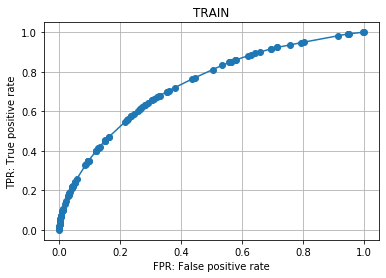

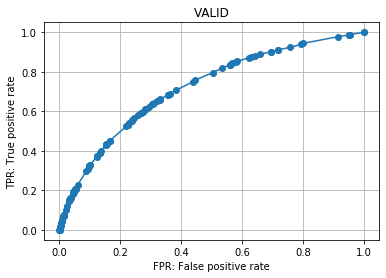

In [307]:
# 前処理の有無を決定木で比較
# ハイパーパラメータはグリッドサーチで最良の値
dtree_8_1 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1)
ml_def(X_train, y_train, X_valid, y_valid, dtree_8_1)

* 決定木の場合、スコアは標準化に関係ない  
→他の分類器では？

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.00000000e+00 4.71922944e-06 3.30346061e-05 ... 9.99948088e-01
 1.00000000e+00 1.00000000e+00]
tpr： [0.         0.         0.         ... 0.99994662 0.99994662 1.        ]
thresholds： [1.58925287e+00 5.89252871e-01 3.35601779e-01 ... 5.15228628e-03
 2.44513671e-04 7.63533918e-17]
roc_auc_score :  0.6212729278997722

valid
fpr： [0.00000000e+00 1.41268877e-05 1.41268877e-05 ... 9.99731589e-01
 9.99731589e-01 1.00000000e+00]
tpr： [0.00000000e+00 0.00000000e+00 6.56706616e-04 ... 9.99835823e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.32141632 0.32141632 0.29679424 ... 0.00864618 0.00854715 0.00316473]
roc_auc_score :  0.6222490521504276


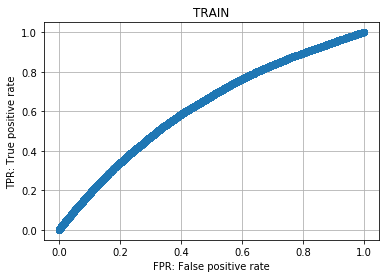

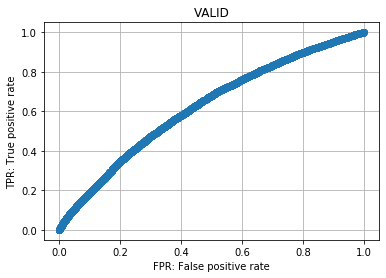

In [308]:
# ロジスティック回帰も比較のため実施
# 標準化なし
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0)
ml_def(X_train, y_train, X_valid, y_valid, lreg)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 ... 9.96965535e-01
 9.96965535e-01 1.00000000e+00]
tpr： [0.00000000e+00 5.33788833e-05 5.33788833e-05 ... 9.99946621e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.89402786e+00 8.94027861e-01 7.84527436e-01 ... 5.22309232e-03
 5.21991493e-03 5.08317871e-06]
roc_auc_score :  0.748895801198886

valid
fpr： [0.00000000e+00 1.41268877e-05 1.41268877e-05 ... 9.99251275e-01
 9.99251275e-01 1.00000000e+00]
tpr： [0.00000000e+00 0.00000000e+00 4.92529962e-04 ... 9.99835823e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.71499331e+00 7.14993308e-01 6.59539403e-01 ... 2.92469260e-03
 2.88346758e-03 2.32380916e-07]
roc_auc_score :  0.7487156714338445


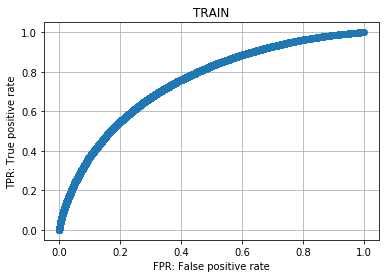

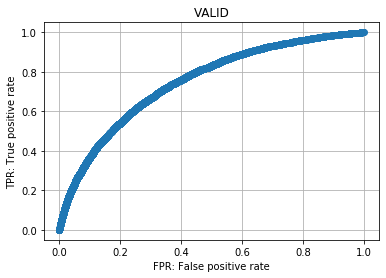

In [309]:
# ロジスティック回帰も比較のため実施
# 標準化あり
lreg_std = LogisticRegression(random_state=0)
ml_def(X_train_std, y_train, X_valid_std, y_valid, lreg_std)

train
fpr： [0.00000000e+00 9.43845889e-06 2.35961472e-05 ... 9.99811231e-01
 9.99811231e-01 1.00000000e+00]
tpr： [0.00000000e+00 1.06757767e-04 1.06757767e-04 ... 9.99946621e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [2.00000000e+000 1.00000000e+000 9.74302454e-001 ... 2.25455868e-004
 2.17246486e-004 1.04958597e-131]
roc_auc_score :  0.7325678195024752

valid
fpr： [0.00000000e+00 1.41268877e-05 1.41268877e-05 ... 9.99717462e-01
 9.99717462e-01 1.00000000e+00]
tpr： [0.00000000e+00 1.64176654e-04 3.28353308e-04 ... 9.99835823e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [2.00000000e+000 1.00000000e+000 7.94207295e-001 ... 3.42280157e-004
 2.88810591e-004 1.69544936e-130]
roc_auc_score :  0.7316058105617015


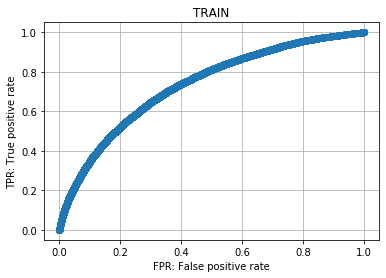

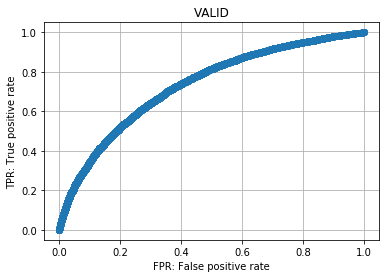

In [310]:
# SGDで学習
# 損失 log, modified_huberしか使えない　なぜ？
# logの方が結果良かったので採用
from sklearn import linear_model
sgd_std = linear_model.SGDClassifier(loss="log")
ml_def(X_train_std, y_train, X_valid_std, y_valid, sgd_std)

* 線形回帰系では、標準化によりスコアアップ
* ロジスティック回帰が現状最も良い
→　ロジスティック回帰のハイパーパラメータ調整　＋　特徴量の制限

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.         0.         0.         ... 0.99937234 0.99937234 1.        ]
tpr： [0.00000000e+00 5.33788833e-05 1.06757767e-04 ... 9.99946621e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.57165224 0.57165224 0.55221432 ... 0.0185643  0.01855858 0.01263299]
roc_auc_score :  0.7225909616272773

valid
fpr： [0.         0.         0.         ... 0.99997175 0.99997175 1.        ]
tpr： [0.00000000e+00 1.64176654e-04 3.28353308e-04 ... 9.99835823e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.54905995 0.54905995 0.54736105 ... 0.01529766 0.01529012 0.01384046]
roc_auc_score :  0.7217541641506361
[('C', 0.00055), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 100), ('multi_class', 'warn'), ('n_jobs', None), ('penalty', 'l2'), ('random_state', 3), ('solver', 'warn'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)]


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

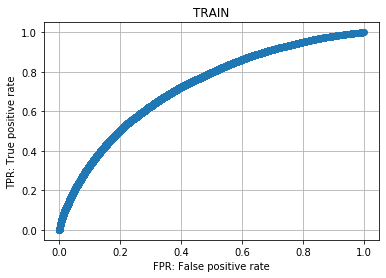

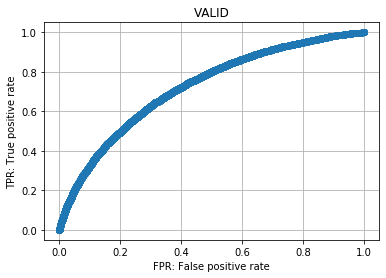

In [311]:
# 決定木で重要だった特徴量の上位10個を使用
# ロジスティック回帰のハイパーパラメータ調整

# 上位10個の列番号を取得（feat_dict_dtreeが昇順の重要度リスト）
columns_num = []
for value, column in feat_dict_dtree[-10:]:
    columns_num.append(X.columns.get_loc(column))
# 取得した列番号を使用し標準化後のXから必要列のみ抽出
X_train_std_feat10 = X_train_std[:, columns_num]
X_valid_std_feat10 = X_valid_std[:, columns_num]

# 「重要度の高い特徴量」のみでロジスティック
diparameter_lreg_feat10={"penalty":["l1", "l2"], "C":[0.00045, 0.0005, 0.00055], "random_state":[3],}
ml_def_gs(X_train_std_feat10, y_train, X_valid_std_feat10, y_valid, diparameter_lreg_feat10, LogisticRegression())

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 ... 9.96682382e-01
 9.96682382e-01 1.00000000e+00]
tpr： [0.00000000e+00 5.33788833e-05 5.33788833e-05 ... 9.99946621e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.90601146e+00 9.06011464e-01 7.90022154e-01 ... 5.10401532e-03
 5.10241991e-03 3.41227580e-08]
roc_auc_score :  0.7489903830311063

valid
fpr： [0.00000000e+00 1.41268877e-05 1.41268877e-05 ... 9.99321909e-01
 9.99321909e-01 1.00000000e+00]
tpr： [0.00000000e+00 0.00000000e+00 4.92529962e-04 ... 9.99835823e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.71303489e+00 7.13034891e-01 6.65352821e-01 ... 2.67561775e-03
 2.66343835e-03 1.04542150e-07]
roc_auc_score :  0.7490324815602425


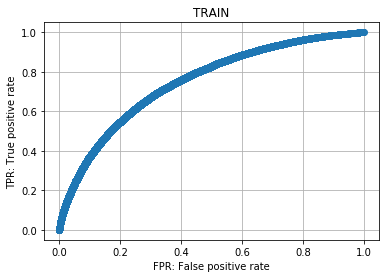

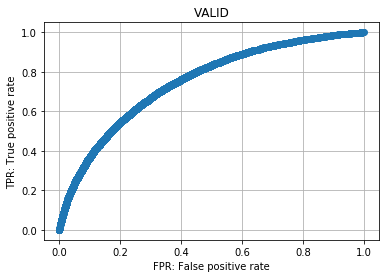

In [313]:
# グリッドサーチで求めたパラメータを使用し、全特徴量で学習
# グリッドサーチでは時間がかかるため手作業で調整
lreg_std_best = LogisticRegression(C=50, penalty="l2")
ml_def(X_train_std, y_train, X_valid_std, y_valid, lreg_std_best)

* ロジスティック回帰　重要度高い特徴量に絞ると結果が悪くなる
* Cは５０、ペナルティーはl２でテスト

In [314]:
# testに対しロジスティック回帰分類
y_test_predict_proba = lreg_std_best.predict_proba(X_test_std)
y_test_predict_proba

array([[1.00000000e+00, 3.49195594e-15],
       [1.00000000e+00, 2.15336451e-16],
       [1.00000000e+00, 2.35959638e-13],
       ...,
       [1.00000000e+00, 5.35253829e-15],
       [1.00000000e+00, 1.77719576e-15],
       [1.00000000e+00, 2.82807750e-14]])

In [332]:
# SK_ID_CURRとtest_predictをdataframe化
test_submit_df = pd.concat([df_test["SK_ID_CURR"], pd.DataFrame(y_test_predict_proba[:, 1])], axis=1)
test_submit_df.head()

,SK_ID_CURR,0
0,100001,3.491956e-15
1,100005,2.153365e-16
2,100013,2.359596e-13
3,100028,2.927384e-17
4,100038,2.575833e-14


In [345]:
# TARGET列名を指定通りに修正
test_submit_df = test_submit_df.rename(columns={0:"TARGET"})
test_submit_df = test_submit_df.set_index("SK_ID_CURR")
test_submit_df.head()

,TARGET
SK_ID_CURR,
100001,3.491956e-15
100005,2.153365e-16
100013,2.359596e-13
100028,2.927384e-17
100038,2.575833e-14


In [346]:
# kaggleに提出するcsv作成
test_submit_df.to_csv("submit_200203.csv")

In [347]:
# 提出ファイルを出力し中身確認
pd.read_csv("submit_200203.csv").head()

,SK_ID_CURR,TARGET
0,100001,3.491956e-15
1,100005,2.153365e-16
2,100013,2.359596e-13
3,100028,2.927384e-17
4,100038,2.575833e-14
